# MNIST - Digit Recognizer

Source of the dataset: https://www.kaggle.com/competitions/digit-recognizer/data

We are using SVM as one of the classifications methods to identify handwritten digits based on the pixels values in the data set. More information on data sets is in the next section:


### Explaination of data sets

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

### Classification Methods

Here, we are trying to use two machine learning methods - **Support Vector Machines** and **Convolutional Neural Network**. We will also try to figure out the optimal parameters to get the best accuracies

# SVM

We are using SVM as one of the classifications methods to identify handwritten digits based on the pixel’s values in the data set. SVM is highly effective in high dimensional spaces. This uses a subset of training points called support vectors in the decision functions making it more memory efficient. 
In our problem, we used 2 models, Linear and RBF models of SVM, evaluate the performances of each model and choose the high performing model. 


## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Importing all the necessary libraries for SVM'''
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For Model building
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# For metric evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# For Cross validation and regularization model building
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# For scaling
from sklearn.preprocessing import scale

## Data Reading

In [3]:
'''Downloaded the data set from Kaggle: https://www.kaggle.com/competitions/digit-recognizer/data. Extracting only the 
train data set '''
digit = pd.read_csv("train.csv")
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The training data set, (train.csv), has 785 columns. The first column is "label" - indicates the number drawn based on the pixel values in the subsequent columns(the rest of 784 columns).

In [4]:
digit.shape #Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total = 784 columns

(42000, 785)

In [5]:
'''there are 785 columns with 784 as pixel cols and one of cols as 'label' '''
digit.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
'''Checking for amount of times the value has been drawn'''

digit.label.value_counts().sort_index(ascending=True)

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

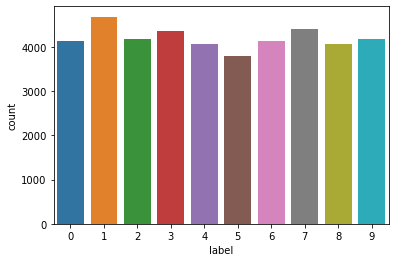

In [7]:
#representing the counts on a bar plot
sns.countplot(digit["label"])
plt.show()

In [8]:
digit.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Data Cleaning and Scaling

In [9]:
'''Checking for missing values in the train data set '''

digit.isnull().sort_index(axis =0).values.any()

False

"False" indicates that there are no null/missing values in the dataset. We have a clean dataset

In [10]:
'''Checking for correlation between various labels by taking their means'''
mean_digit = digit.groupby('label').mean()
mean_digit.sort_index()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='label'>

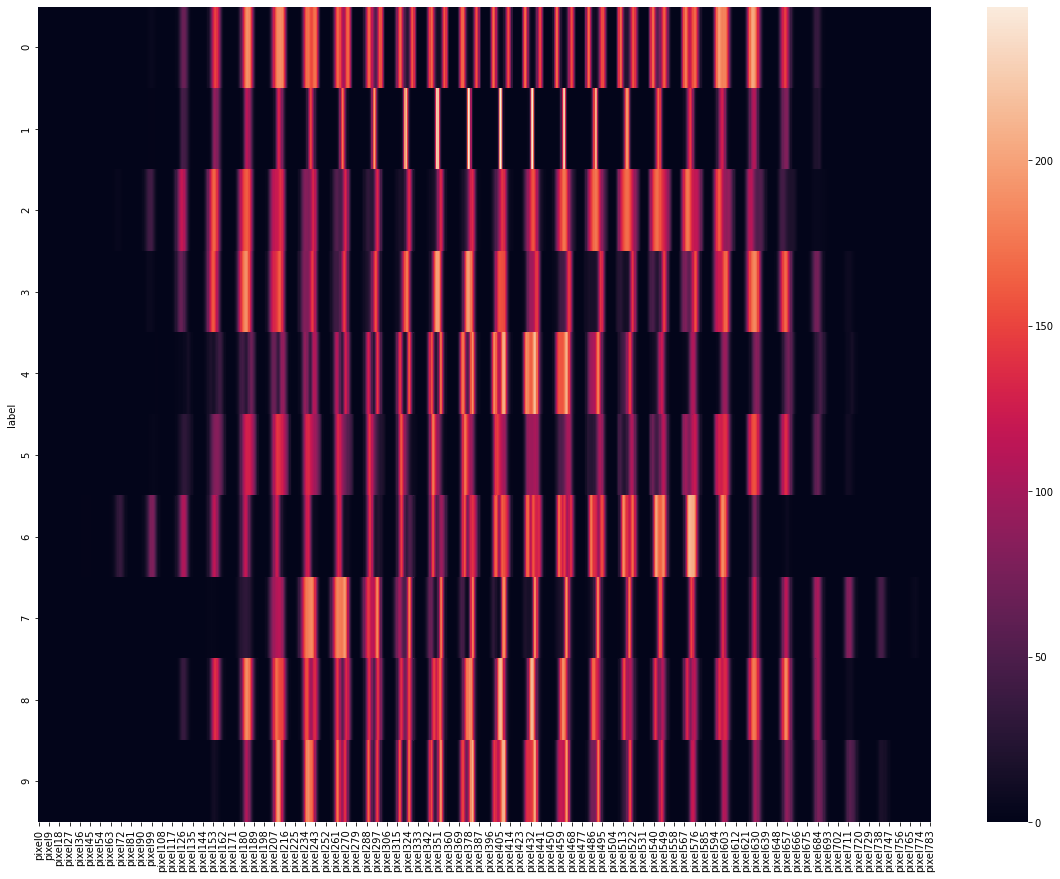

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(mean_digit)

In [12]:
'''The whole dataset is of numerical datatype. There are NO categorical variables. There is no need to convert them
categorical datatype'''
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [13]:
#digit = digit.sort_values('label')
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Digit Label: 4


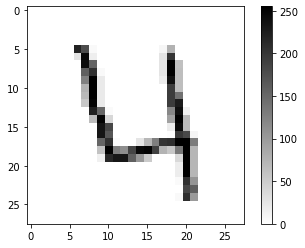

In [14]:
'''Reading one of the digits'''

digit_arr = digit.loc[3, "pixel0":]
arr = np.array(digit_arr) 

image_arr = np.reshape(arr, (28,28))

digit_image = plt.imshow(image_arr, cmap=plt.cm.binary)
plt.colorbar(digit_image)
print("Digit Label: {}".format(digit.loc[3, "label"]))





**Few Conclusions based on EDA:**
- No need of any outlier treatment as we have to consider all the values. All these values contribute to the construction of a pixelated image.
- No need to use any dummy variables or convert them to categorical data type as the whole data set is of numerical or integer data type. 
- Scaling and Normalization can be performed. 

In [15]:
'''Spliting the label column from the dataset'''
X = digit.drop("label", axis = 1)
y = digit['label']

### Train-Valid split

In [16]:
'''Spliting the dataset into Train and Valid. Alloting 30% of the data to validation data set'''
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 101)

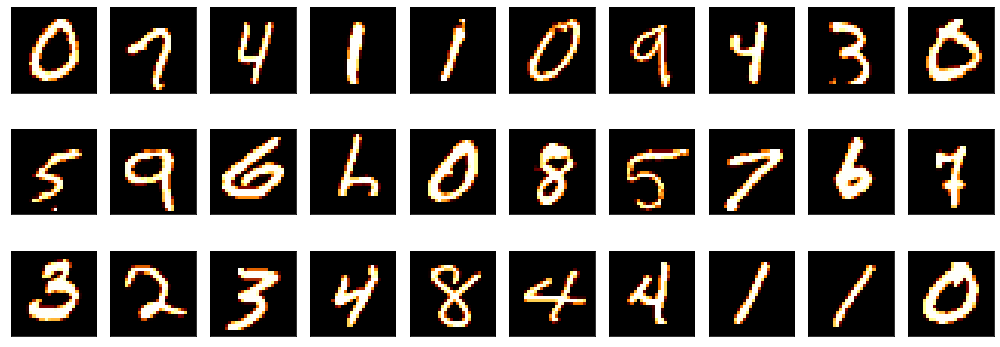

In [17]:
'''Plotting some digits from train dataset'''

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = X_train.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [18]:
'''Dimensions of Train and Validation datasets'''
print("Train_pixels = ", format(X_train.shape) + "\n"
     "Train_o_label = ", format(y_train.shape) + "\n"
     "Valid_pixels = ", format(X_valid.shape) + "\n"
     "Valid_o_label = ", format(y_valid.shape) + "\n")

Train_pixels =  (33600, 784)
Train_o_label =  (33600,)
Valid_pixels =  (8400, 784)
Valid_o_label =  (8400,)



## Feature Scaling, PCA decomposition and Model Building

Since we have a high number of dimensions, it makes sense to reduce remove any dimensions/features which cause a high amount of redundancy and focus on the dimensions which are actually required to predict the output. Before applying PCA, it is necessary we standardize both the training and validation datasets.

### Min-Max Scaling on Train and Validation datasets

In [19]:
'''Before applying PCA'''

from sklearn.preprocessing import MinMaxScaler
#Scaling data
scale = MinMaxScaler()

# Scaling train data-set
X_train_scaled = scale.fit_transform(X_train)


# Scaling validation data-set
X_valid_scaled = scale.fit_transform(X_valid)

### PCA Decomposition

Principal component analysis is linear dimensionality reduction using single value decomposition of data to lower the number of dimensions. Choose the n_components parameter of PCA which gives higher accuracy score for the dataset and remove the dimensions which cause high redundancy accordingly to focus on dimensions which are actually required

In [ ]:
'''function to run PCA and SVC with different kernel types'''
from sklearn.decomposition import PCA
# pca = decomposition.PCA()
def n_components_accuracy(n,X_train, y_train, X_valid, y_valid, k_type):
    pca = PCA(n_components = n)
    print("n_components = ", format(n))
    pca.fit(X_train)
    pca_X_train = pca.transform(X_train)
    pca_X_val = pca.transform(X_valid)
    
    svc_applied = SVC(kernel = k_type)
    svc_applied.fit(pca_X_train,y_train)
    svc_predict_label = svc_applied.predict(pca_X_val)
    accuracy_svc = metrics.accuracy_score(y_valid,svc_predict_label)
    print("Accuracy = ", format(accuracy_svc))
    return accuracy_svc

# pca = decomposition.PCA()
# pca.n_components = 2
# pca_data_train = pca.fit_transform(X_train)
# pca_data_valid = pca.fit_transform(X_valid)

In [21]:
'''we typically want the 85-95% of the data explaining the variance. So we check for explaination of variance 
when n_components are from .85 to .95'''

n_component_list = np.linspace(0.85,0.95,num=10)
accuracy = []
def pca_svc(n_component_list,kernel_name):
    print("Running SVC with kernel type = ", format(kernel_name))
    for n in n_component_list:
        acc= n_components_accuracy(n,X_train_scaled, y_train, X_valid_scaled, y_valid, kernel_name)
        accuracy.append(acc)
    



In [22]:
pca_svc(n_component_list,"linear")

Running SVC with kernel type =  linear
n_components =  0.85
Accuracy =  0.9332142857142857
n_components =  0.861111111111111
Accuracy =  0.934404761904762
n_components =  0.8722222222222222
Accuracy =  0.9353571428571429
n_components =  0.8833333333333333
Accuracy =  0.9365476190476191
n_components =  0.8944444444444444
Accuracy =  0.9371428571428572
n_components =  0.9055555555555556
Accuracy =  0.9357142857142857
n_components =  0.9166666666666666
Accuracy =  0.9372619047619047
n_components =  0.9277777777777777
Accuracy =  0.9371428571428572
n_components =  0.9388888888888889
Accuracy =  0.9375
n_components =  0.95
Accuracy =  0.9348809523809524


In [23]:
del accuracy
accuracy = []
pca_svc(n_component_list,"rbf")

Running SVC with kernel type =  rbf
n_components =  0.85
Accuracy =  0.9811904761904762
n_components =  0.861111111111111
Accuracy =  0.9814285714285714
n_components =  0.8722222222222222
Accuracy =  0.9816666666666667
n_components =  0.8833333333333333
Accuracy =  0.9811904761904762
n_components =  0.8944444444444444
Accuracy =  0.9811904761904762
n_components =  0.9055555555555556
Accuracy =  0.9808333333333333
n_components =  0.9166666666666666
Accuracy =  0.9809523809523809
n_components =  0.9277777777777777
Accuracy =  0.9810714285714286
n_components =  0.9388888888888889
Accuracy =  0.9811904761904762
n_components =  0.95
Accuracy =  0.9809523809523809


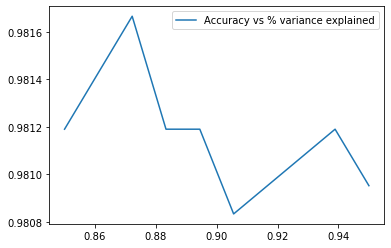

In [24]:
plt.figure()
plt.plot(n_component_list,np.array(accuracy),label='Accuracy vs % variance explained')
plt.legend()
plt.show()

From the above we can see that the accuracy peaked around 0.87. So, we are considering n_components for PCA to be 0.87

With n_components as 0.87, the RBF model gives the highest accuracy - we will proceed with this model.


### Optimising hyperparameter (Using Gridsearch)

In [31]:
# #Creating a KFold object with 5 splits 
# folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# #Setting the parameters for cross-validation
# hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
#                     'C': [1, 10, 20]}]


# #Specifying kernel to be used for model building
# model = SVC(kernel="rbf")

# #Setting up GridSearchCV
# model_cv = GridSearchCV(estimator = model, 
#                        param_grid = hyper_params, 
#                        scoring= 'accuracy', 
#                        cv = 4,
#                        n_jobs=-1,
#                        verbose = 1,
#                        return_train_score=True)      

# #Fitting the model
# model_cv.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 20], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [32]:
# cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,188.763210,2.122584,107.841897,2.962313,1,0.01,"{'C': 1, 'gamma': 0.01}",0.969524,0.966786,0.971310,0.965357,0.968244,0.002318,3,0.982738,0.983175,0.983056,0.983016,0.982996,0.000160
1,337.558379,2.436431,144.662939,2.490811,1,0.001,"{'C': 1, 'gamma': 0.001}",0.929405,0.919286,0.932143,0.926071,0.926726,0.004804,7,0.931151,0.933651,0.931389,0.932659,0.932212,0.001009
2,862.029877,2.948528,282.529215,7.055029,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.888333,0.880119,0.889405,0.890357,0.887054,0.004067,9,0.888373,0.891389,0.887579,0.888571,0.888978,0.001440
3,164.410081,2.849948,98.758446,1.915554,10,0.01,"{'C': 10, 'gamma': 0.01}",0.977381,0.975476,0.978929,0.974762,0.976637,0.001633,1,0.999643,0.999683,0.999722,0.999762,0.999702,0.000044
4,168.040193,2.287961,97.158844,7.388441,10,0.001,"{'C': 10, 'gamma': 0.001}",0.950238,0.943571,0.951071,0.946667,0.947887,0.002991,5,0.960040,0.960913,0.960714,0.961587,0.960813,0.000552


In [33]:
# cv_results.sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
3,164.410081,2.849948,98.758446,1.915554,10,0.01,"{'C': 10, 'gamma': 0.01}",0.977381,0.975476,0.978929,0.974762,0.976637,0.001633,1,0.999643,0.999683,0.999722,0.999762,0.999702,0.000044
6,163.143296,3.621349,91.512228,2.638200,20,0.01,"{'C': 20, 'gamma': 0.01}",0.977857,0.975238,0.978333,0.975000,0.976607,0.001500,2,0.999921,0.999960,0.999960,0.999960,0.999950,0.000017
0,188.763210,2.122584,107.841897,2.962313,1,0.01,"{'C': 1, 'gamma': 0.01}",0.969524,0.966786,0.971310,0.965357,0.968244,0.002318,3,0.982738,0.983175,0.983056,0.983016,0.982996,0.000160
7,152.804434,3.021952,86.967303,4.537312,20,0.001,"{'C': 20, 'gamma': 0.001}",0.953095,0.949762,0.955952,0.949643,0.952113,0.002614,4,0.970714,0.971190,0.970635,0.971389,0.970982,0.000317
4,168.040193,2.287961,97.158844,7.388441,10,0.001,"{'C': 10, 'gamma': 0.001}",0.950238,0.943571,0.951071,0.946667,0.947887,0.002991,5,0.960040,0.960913,0.960714,0.961587,0.960813,0.000552
8,279.309089,1.324996,127.028254,12.954888,20,0.0001,"{'C': 20, 'gamma': 0.0001}",0.933929,0.921190,0.935119,0.929524,0.929940,0.005465,6,0.935913,0.938056,0.935159,0.935595,0.936181,0.001115
1,337.558379,2.436431,144.662939,2.490811,1,0.001,"{'C': 1, 'gamma': 0.001}",0.929405,0.919286,0.932143,0.926071,0.926726,0.004804,7,0.931151,0.933651,0.931389,0.932659,0.932212,0.001009
5,331.623591,11.389338,158.555682,8.964112,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.926071,0.915357,0.928690,0.923571,0.923423,0.004996,8,0.927738,0.929603,0.927341,0.928452,0.928284,0.000860
2,862.029877,2.948528,282.529215,7.055029,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.888333,0.880119,0.889405,0.890357,0.887054,0.004067,9,0.888373,0.891389,0.887579,0.888571,0.888978,0.001440


Based on the above, the optimal hyper parameters for SVC are C = 10 and gamma = 0.01

In [34]:
# # Optimal accuracy score and hyperparameters
# best_score = model_cv.best_score_
# best_hyperparams = model_cv.best_params_

# print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9766369047619048 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


***Above code is commented as the Gridsearch will take a longer time to find the optimal hyperparamaters. Please feel free to uncommented the code if necessary.***

### Building the model with optimal hyperparameters


In [35]:
# Model with optimal hyperparameters
pca = PCA(n_components = 0.87)
pca.fit(X_train)
pca_X_train = pca.transform(X_train_scaled)
pca_X_val = pca.transform(X_valid_scaled)


In [36]:
model_final = SVC(C=10, gamma=0.01, kernel="rbf")
model_final.fit(pca_X_train, y_train) # Fitting the model

SVC(C=10, gamma=0.01)

In [37]:
#model_final.fit(pca_X_val, y_train)
# Prediction on train dataset for Non-linear model
y_train_pred_label = model_final.predict(pca_X_train)

# Prediction on validation dataset for Non-linear model
y_valid_pred_label = model_final.predict(pca_X_val)

In [38]:
metrics.accuracy_score(y_train, y_train_pred_label)#accuracy on train data 

0.9972321428571429

In [39]:
metrics.accuracy_score(y_valid, y_valid_pred_label)#accuracy on validation data 

0.9810714285714286

In [40]:
print(metrics.classification_report(y_valid, y_valid_pred_label))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       826
           1       0.99      0.99      0.99       937
           2       0.98      0.99      0.99       835
           3       0.98      0.97      0.97       870
           4       0.98      0.99      0.98       814
           5       0.97      0.97      0.97       759
           6       0.99      0.99      0.99       828
           7       0.98      0.98      0.98       880
           8       0.98      0.98      0.98       813
           9       0.98      0.96      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



## Evaluating on unknown test data (from Kaggle)

Considering the test.csv from kaggle website - https://www.kaggle.com/competitions/digit-recognizer/data to predict the label column. Once we have the predicted labels, the output is uploaded to Kaggle for an accuracy score. 

In [41]:
test_data = pd.read_csv('test.csv')# downloaded from https://www.kaggle.com/c/digit-recognizer/data
test_data.head()# this data set has no 'label' column

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
pca_X_val.shape

(8400, 63)

In [43]:
pca_X_train.shape
# pca_X_train = pd.DataFrame(pca_X_train)


(33600, 63)

In [44]:
pca_X_train.shape

(33600, 63)

In [45]:
test_data = test_data[X_train.columns]

In [46]:
X_train_scaled.shape

(33600, 784)

In [47]:
test_data.shape

(28000, 784)

In [48]:
pca_X_train.shape

(33600, 63)

In [49]:

# mnist_test_arr = np.array(test_data)
# mnist_test_arr = mnist_test_arr.reshape(mnist_test_arr.shape[0], 28, 28, 1)

test_data_scaled = scale.transform(test_data)#feature scaling the data using minmax scaler.
# test_data=(test_data-X.min())/(X.max()-X.min())
# X_t=df_test[X.columns]
# Doing the PCA transform
# X_trans=pca.transform(X_t)

In [50]:
test_data_scaled.shape

(28000, 784)

In [51]:
# pca = PCA(n_components = 0.86)
# pca.fit(test_data)
pca_X_test = pca.transform(test_data_scaled)

In [52]:
pca_X_test.shape

(28000, 63)

In [53]:
y_pred_final = model_final.predict(pca_X_test) #predicting on test data..

In [54]:
y_pred_final

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [55]:
id = np.arange(1,28001,1)#creating a data frame with imageid and predicted label to submit it on kaggle.
kaggle_df = pd.concat([pd.Series(id),pd.Series(y_pred_final)],axis=1)
kaggle_df.columns = ['ImageId','Label']
kaggle_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [56]:
kaggle_df.to_csv('mnist_svm.csv',index=False)#exporting is as csv file, submitting it on kaggle and to recieve a score. 

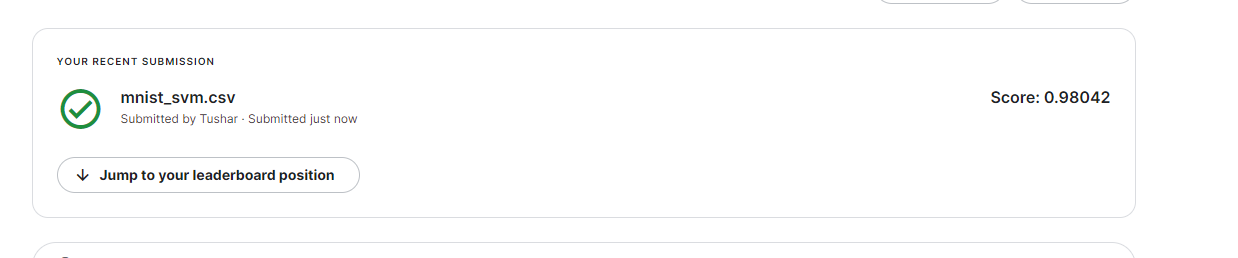

### Submitting the above result in Kaggle gives me a score of 0.98042

# CNN Model

From face recognition on a phone camera, to self-driving algorithms employed in the most high-end electronic vehicles on the market today - CNN or Convolutional Neural Networks are at the base of most of the breakthrough innovations happening today. CNNs are a type of ANN or Atrificial Neural Network that are mostly used in image processing.

How it works:
Pixels - we've all heard of this term. With camera phones flexing their dozens or even hundreds of mega-pixel cameras, the term pixel has found a place in common vocabulary in the past few years. A pixel is nothing but a unit area of an image. It is generally represented by a square of 1x1 size.
Essnetially, an image can be represented as a matrix of pixels. The more the pixel, the more information can be captured within the picture. Mostly, each pixel contains information in 3 dimensions or channels (most used - Red, Green and Blue channels). These channels talk about how intense a particular color is for a particular pixel.

Now, in these matrix of pixels - there are a lot of patterns. For purposes such as image recognition or classification, we can use these patterns to identify which part of an image represents what. For example, in recognizing handwriting, as we are doing here, we can focus on some specific strokes or curves as features. If there is a curve present in an image - it'd be one of the digits that have a curve, say 2,3,5,6,8,9, or 0. Now based on how many curves (features) and their relative locations, we can differentiate between numbers.

That is exactly what a CNN does - it adds some hidden layers - whose purpose is to derive features from images that are later used for classification, identification, and recognition.

## Importing Libraries

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D, Dense, Dropout, Flatten # core layers and convulation layers
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K

from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

In [5]:
#creating a new dataframe
digit1 = digit

Set data features and labels

In [6]:
X = digit1.drop(['label'], 1).values
y = digit1['label'].values

Reshape

In [7]:
#Scaling the data 
''' dividing all the values by 255 will convert it to range from 0 to 1'''
X = X / 255.0 

In [8]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# canal = 1 => For gray scale
X = X.reshape(-1,28,28,1)

## One-Hot Encoding"

In [9]:
# Encode labels to vectors
y = to_categorical(y)

print(f"Label size {y.shape}")

Label size (42000, 10)


## Split training and valdiation set

In [10]:
# Split the train and the validation set for the fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

## Normalization

In [12]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

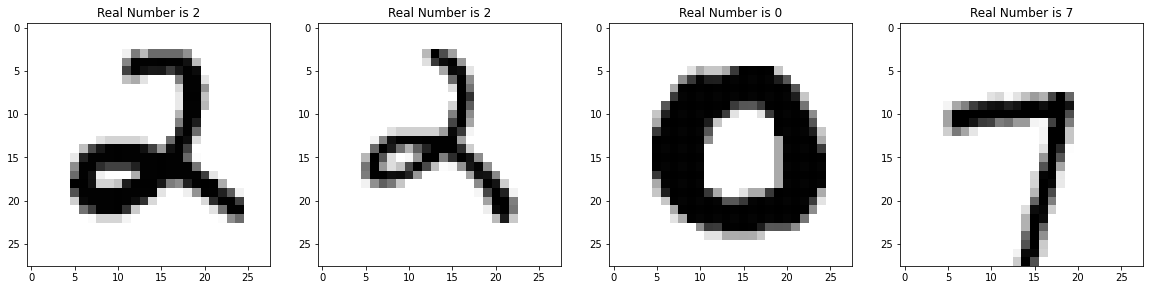

In [13]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

## Building Model

In [14]:
model=Sequential()
 
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512,activation="relu"))  
model.add(Dense(10,activation="softmax"))    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

Data augmentation

Data augmentation is a technique in which one alters the training data that change representation, while keeping the label same. This technique is one of the ways to avoid the problem of overfitting. In this solution, we can expand our handwritten digit dataset. We can make the existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples. This massive increase in training data leads to much more robust results and better models.

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  #set input mean to 0 over the dataset
        samplewise_center=False,  #set each sample mean to 0
        featurewise_std_normalization=False,  #divide inputs by std
        samplewise_std_normalization=False,  #divide each input by its std
        zca_whitening=False,  #ZCA whitening
        rotation_range=15,  #rotate images
        zoom_range = 0.015, #Randomly zoom images 
        width_shift_range=0.15,  #shift images horizontally
        height_shift_range=0.15,  #shift images vertically
        horizontal_flip=False,  #flip images horizontally
        vertical_flip=False)  #flip images vertically


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=128)
test_gen = datagen.flow(X_test, y_test, batch_size=128)

Data was augmented (to enhance the training set and accuracy, as described) by:

* Rotating randomized training images by 15 degrees
* Zooming random training images by 15% 
* Horizontally and Vertically shifting images by 15%

## Model training

In [17]:
epochs = 3
batch_size = 128
train_steps = X_train.shape[0] // batch_size
valid_steps = X_test.shape[0] // batch_size

es = keras.callbacks.EarlyStopping(
        monitor="val_acc", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [18]:
# Fit the model
history = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = train_steps,
                              validation_data = test_gen,
                              validation_steps = valid_steps, 
                              callbacks=[es, rp])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
295/295 [==============================] - 74s 252ms/step - loss: 0.2001 - accuracy: 0.9368 - val_loss: 1.2350 - val_accuracy: 0.6101
Epoch 2/3
295/295 [==============================] - 74s 251ms/step - loss: 0.0749 - accuracy: 0.9767 - val_loss: 0.1058 - val_accuracy: 0.9707
Epoch 3/3
295/295 [==============================] - 74s 249ms/step - loss: 0.0581 - accuracy: 0.9817 - val_loss: 0.0611 - val_accuracy: 0.9817


### Plot CNN model

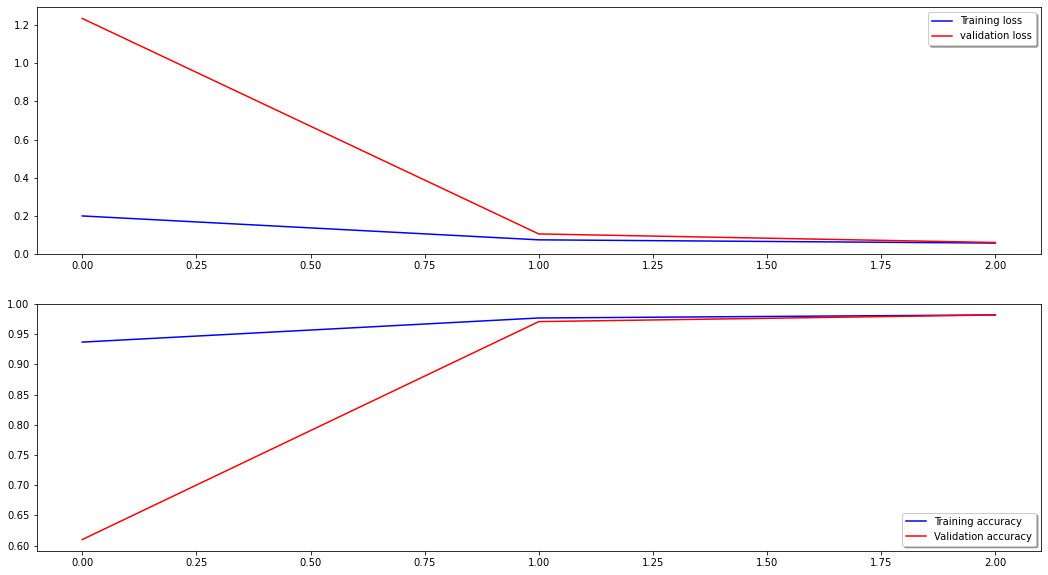

In [19]:
# Loss and accuracy curves for training and validation are plotted below
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Confusion matrix

Confusion matrix brings model shortcomings to light. The confusion matrix plotted below is going to show us the validation results.

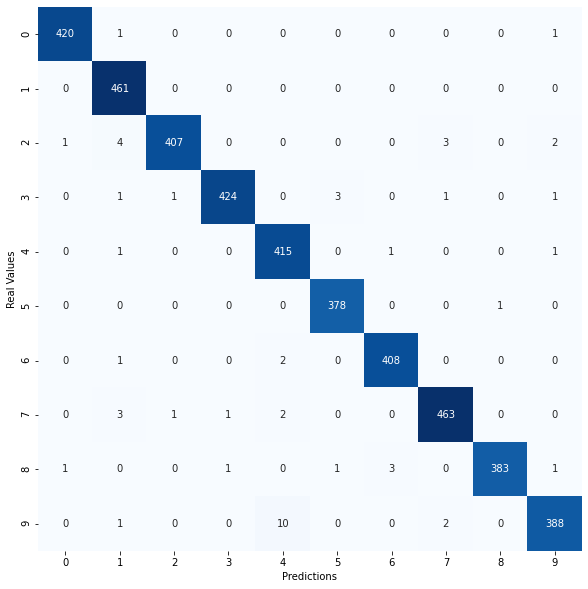

In [20]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict class probabilities

Y_pred = np.argmax(y_pred, 1) 
Y_test = np.argmax(y_test, 1)

conf_mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(conf_mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predictions')
plt.ylabel('Real Values');
plt.show();

Prediction has been validated below

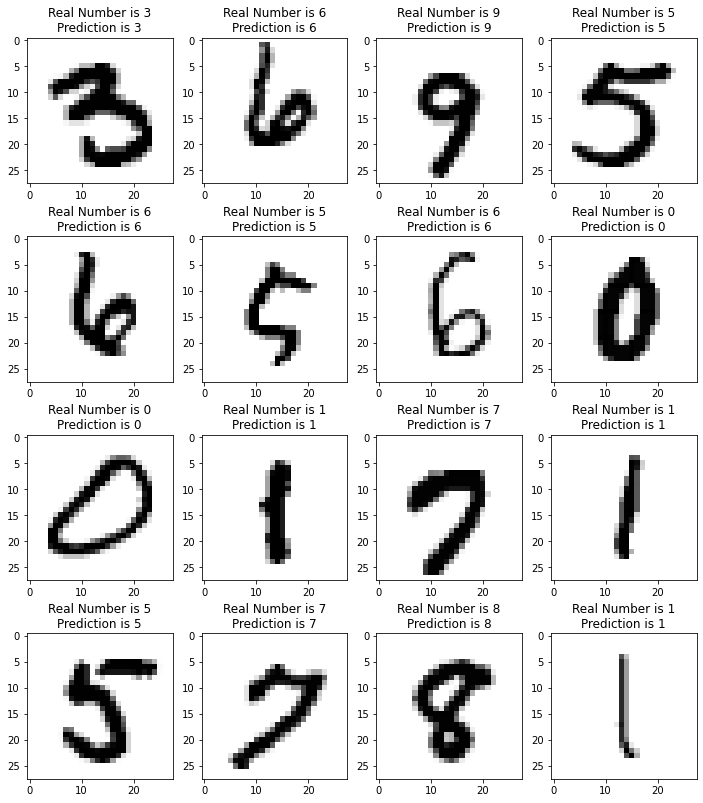

In [21]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPrediction is {y_pred[i].argmax()}");

## Evaluating on unknown test data (from Kaggle)

Considering the test.csv from kaggle website - https://www.kaggle.com/competitions/digit-recognizer/data to predict the label column. Once we have the predicted labels, the output is uploaded to Kaggle for an accuracy score. 

In [22]:
digit_test = pd.read_csv("test.csv")
digit_test.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:

digit_test = digit_test.values
digit_test = digit_test / 255.0
digit_test = digit_test.reshape(-1,28,28,1)



In [24]:
# predict test data
# pred = model.predict_classes(digit_test, verbose=1)
predict_x=model.predict(digit_test)
pred = np.argmax(predict_x,axis=1)

In [25]:
id = np.arange(1,28001,1)#creating a data frame with imageid and predicted label to submit it on kaggle.
kaggle_df_cnn = pd.concat([pd.Series(id),pd.Series(pred)],axis=1)
kaggle_df_cnn.columns = ['ImageId','Label']
kaggle_df_cnn.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [33]:
kaggle_df_cnn.to_csv('mnist_cnn.csv',index=False)#exporting is as csv file, submitting it on kaggle and to recieve a score. 

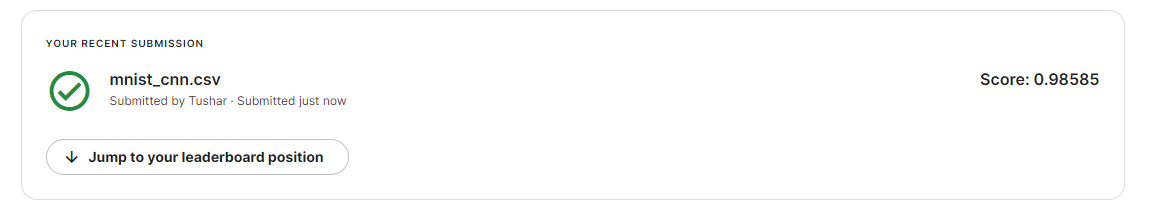


### Submitting on Kaggle gives us a accuracy of 0.98585

## Conclusion


### On SVM

-	There was no need of any outlier treatment(we have to consider all the values to predict a label). There was no need for dummy variables or any conversion to categorical variables. Scaling or Normalization may be required before PCA. 
-	Since we have 784 features explaining a label, it was necessary that we bring in PCA to summarize the content and explain the variance using Principal Components
-	The model was trained on two different kernel types – RBF and Linear. RBF was giving the highest accuracy explaining 86% variance in the data set. 
-	With n_components= 0.86, C = 10 and gamma = 0.01, Training samples have significant impact on the model – giving an accuracy of ~99%
-	Accuracy when predicted labels (predicted on test data) are uploaded to Kaggle gives us around 98%


### On CNN

- Again, there no need of any outlier treatment or pre-processing of the dataset other than scaling or normalization.
- We have choosen Keras Sequential Model
- This model gives us an accuracy of 98.5% on the test data when uploaded to kaggle

Thus, using CNN it gives us the highest accuracy on test data set = 98%